<div class="alert alert-block alert-info">
    
<font color='blue'>

# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Gas Well Model (PROSPER)

</font>

</div>




## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
#import cv2

from collections import defaultdict       # library to create var dictionaries
from openserver import OpenServer         # Library to connect Python with PROSPER using Openserver
from IPython.display import Javascript    # run multiple cells at once
from IPython.display import display_html  # Display Multiple Data Frames in one cell
from IPython.display import clear_output  # Clear output cell

from IPython.display import display, HTML, Markdown
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>")) # Comments color = blue

import ipywidgets as widgets

### Set RGB color variables to reduce code
c_red = (255/255, 0/255, 0/255) # red
c_blue = (0/255, 0/255, 255/255) # Blue
c_green = (0/255, 255/255, 0/255) # Green
c_orange = (255/255, 165/255, 0/255) # Orange
c_pale_green = (152/255,251/255,152/255) # Pale green
c_Dred = (139/255,0/255,0/255) # Dark red
c_black = (0/255,0/255,0/255)
c_LDark = (0/149,0/149,0/149) # Light dark

## 2. Input Variables

Set input Variables as distributions or constants <br>
If variables _Const is True, one single value will be sent to PROSPER model <br>
Units must be checked on PROSPER model

In [2]:

Input_var_dict ={}


### RESERVOIR PRESSURE - Uniform distribution ###
var_label = 'Reservoir Pressure'
low, high = 3500, 4500
val_mean, val_SD = 2000, 15 
val_Const = 2500
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Pr'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


## PERMEABILITY
var_label = 'Permeability'
low, high = 0.001, 100 # Permeability limits to truncate distribution. Avoid negative permeability
val_mean, val_SD = 50, 5 
val_Const = 25
Dist_Type = 'Normal' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['k'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]



### RESERVOIR HEIGHT ###
var_label = 'Reservoir Height'
low, high = 20, 90 #limits to truncate distribution
val_mean, val_SD = 50, 6 
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['h'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### PERFORATION INTERVAL ###
### Max limit must be equal or less than Reservoir Height
### Iterations where Perforation interval is more than Reservoir Height 
### the Perforatio interval will be set equal to reservoir height

var_label = 'Perforation Interval'
low, high = 50, 85 #limits to truncate distribution
val_mean, val_SD = 44, 6 
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Perf'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Skin ###

var_label = 'Skin'
low, high = -5, 50 #limits to truncate distribution
val_mean, val_SD = 38, 10 
val_Const = 2
Dist_Type = 'Normal' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['S'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]



### WGR ###
var_label = 'Water-Gas Rate'
low, high = 0, 500 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['WGR'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Drainage Area ### 
var_label = 'Drainage Area'
low, high = 0, 1000 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 701
Dist_Type = 'Constant' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['DA'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Top Node Pressure ###
var_label = 'Top Node Pressure'
low, high = 250, 1000 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 701
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Top_Press'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


Input_var_dict


{'Pr': [3500, 4500, 2000, 15, 2500, 'Uniform', 'Reservoir Pressure'],
 'k': [0.001, 100, 50, 5, 25, 'Normal', 'Permeability'],
 'h': [20, 90, 50, 6, 20, 'Uniform', 'Reservoir Height'],
 'Perf': [50, 85, 44, 6, 20, 'Uniform', 'Perforation Interval'],
 'S': [-5, 50, 38, 10, 2, 'Normal', 'Skin'],
 'WGR': [0, 500, 300, 20, 20, 'Uniform', 'Water-Gas Rate'],
 'DA': [0, 1000, 300, 20, 701, 'Constant', 'Drainage Area'],
 'Top_Press': [250, 1000, 300, 20, 701, 'Uniform', 'Top Node Pressure']}

## 3. Plot input variables distributions

Run multiple Cells to create Input variable distributions and CQ

In [3]:
### CELL 7 ###
Javascript("Jupyter.notebook.execute_cell_range(7,13)") 

<IPython.core.display.Javascript object>

### Create function to plot normal/uniform distributions

In [4]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit,V_Constant, V_x_Label, V_Title, n_col,n_row, Dist_Type=None):
    n_bins = 30
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution

    if Dist_Type == 'Constant':
        N_Samples = np.random.uniform(low = V_Constant, high = V_Constant, size = 10000)
        
    if Dist_Type == 'Uniform':
        N_Samples = np.random.uniform(low = V_Low_limit, high = V_High_limit, size = 10000)
        
    if Dist_Type == 'Normal':
        N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[n_row,n_col].hist(N_Samples, bins=n_bins, density=True, align='mid', color=(RBG), alpha=1, edgecolor = "black")
    AX[n_row,n_col].set_xlabel(' ')
    AX[n_row,n_col].set_ylabel('Probability Density')
    AX[n_row,n_col].set_title(V_Title, weight='bold', fontsize = 18)
    x_axis = AX[n_row,n_col].set_xlim()

    
    ## generate data for truncated normal distribution
    
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)

    if Dist_Type == 'Constant':
        NT_Samples = np.random.uniform(low = V_Constant, high = V_Constant, size = 10000)
        
    if Dist_Type == 'Uniform':
        NT_Samples = np.random.uniform(low = V_Low_limit, high = V_High_limit, size = 10000)
        
    if Dist_Type == 'Normal':
        NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)
        
    ## Plot truncated Normal distribution
    AX[n_row+1,n_col].hist(NT_Samples, bins=n_bins, density=True, align='mid', color=RBG, alpha=0.4, edgecolor = "black")
    AX[n_row+1,n_col].set_xlabel(' ')
    AX[n_row+1,n_col].set_ylabel('PD')
    AX[n_row+1,n_col].set_title(V_Title + ' (TRUNCATED)')
    AX[n_row+1,n_col].set_xlim(x_axis)


### Plot variables distribution

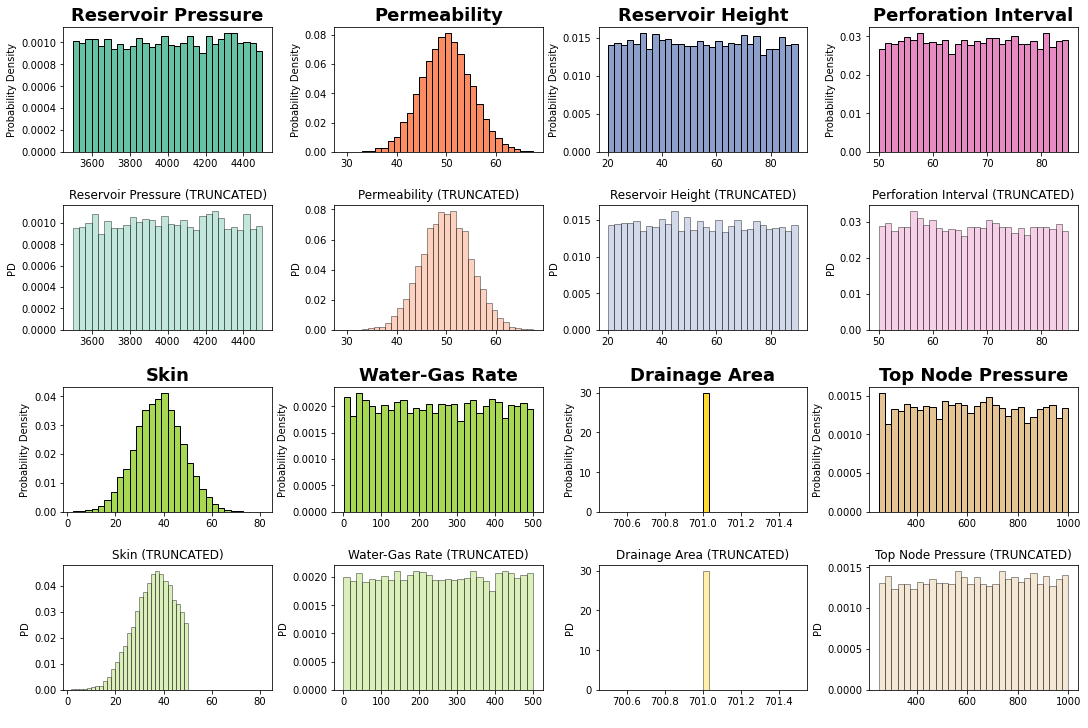

In [5]:
fig, AX = plt.subplots(nrows = 4, ncols=4, figsize=(15,10), layout ='constrained')

#cmap = matplotlib.cm.get_cmap('rocket')
cmap = sns.color_palette('Set2', as_cmap=True)

icolor = 0.1
i_samples = 10000
i_col = 0
i_row = 0
for key in Input_var_dict.keys():
    

    RBG = cmap(icolor)[0],cmap(icolor)[1],cmap(icolor)[2]
    icolor = icolor + 0.1
    
    i_mean, i_SD = Input_var_dict[key][2], Input_var_dict[key][3]
    i_Low_limit, i_High_limit = Input_var_dict[key][0], Input_var_dict[key][1]
    i_constant = Input_var_dict[key][4]
    i_x_Label, i_Title = Input_var_dict[key][6], Input_var_dict[key][6]
    i_Dist_Type = Input_var_dict[key][5]

    Generate_normal_and_Truncated(i_mean, i_SD, i_samples, i_Low_limit, i_High_limit, i_constant, i_x_Label, i_Title, i_col,i_row, i_Dist_Type)
    
    i_col = i_col + 1
    if i_col > 3:
        i_col = 0
        i_row = 2


# Import production test history data 
Production test data will be used to validate results from well model (WHP/Qg production test vs well model results) <br>
Choke values from production test can be used on well model calculation

In [6]:
df_PDP_hist = pd.read_csv ('comp_PDP_data.csv', delimiter=';')
df_PDP_hist['Gas'] = df_PDP_hist['Gas'].div(1000)
df_PDP_hist.describe()

,Gas,Oil,Water,WHP,Choke,CGR,API,GOR,Water Cut,Salinity,WGR
count,113.000000,103.000000,93.000000,113.000000,113.000000,103.000000,103.000000,65.000000,93.000000,92.000000,93.000000
mean,1.270531,27.073786,96.304301,1057.451327,16.513274,16.251456,74.066990,48999.532308,77.640860,1100.030435,148.197849
std,0.790784,24.357629,55.430418,260.130633,2.100659,8.826141,2.199661,12847.138443,30.592949,242.654776,103.675325
min,0.350700,1.000000,1.000000,727.000000,14.000000,2.400000,69.600000,21596.900000,1.900000,528.000000,0.500000
25%,0.558500,5.450000,50.600000,834.000000,14.000000,7.850000,72.100000,37974.000000,68.200000,909.250000,42.000000
50%,0.960000,17.700000,98.000000,958.000000,18.000000,16.300000,74.500000,45825.000000,95.500000,1106.000000,167.300000
75%,1.953800,46.000000,136.000000,1236.000000,18.000000,23.500000,75.800000,58687.500000,97.200000,1288.000000,239.000000
max,2.726700,77.000000,174.000000,1561.000000,20.000000,46.300000,77.300000,83928.600000,100.000000,1757.000000,394.700000


# Well Choke input

In [7]:
# Extract Choke List from production test (history) data
CK_PT_list = df_PDP_hist['Choke'].unique()
print('Production Test Chokes = ', CK_PT_list)

# Specify choke values to be used on well model (PROSPER). 
Choke_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,40,64,104]

Choke_list = [28]
print('Choke list from user = ', Choke_list)

# Specify if the Chokes from Production Test are used as input for PROSPER
use_PT_choke = False 

if use_PT_choke == True:
    Choke_list = CK_PT_list

print('Chokes to be used on PROSPER = ', Choke_list)

Production Test Chokes =  [18 16 14 20]
Choke list from user =  [28]
Chokes to be used on PROSPER =  [28]


<div class="alert alert-success">
<font color='blue'>
    
# VLP correlation
Specify if VLP correlation will be used as variable for each iteration
***
</font>
Cell 19
</div>

In [ ]:
### if VLP_corr_status = true, each iteration will have different VLP correlation 

VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,14,18,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
             'GREmodifiedbyPE', 'PetroleumExperts4', 'Hydro3P']

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1


**Exclude Correlations: GREmodifiedbyPE and PetroleumExperts4 <br>**
**These correlations take longer time to calculate. Running the next cell wil exclude these two correlations**

Total number of correlations =  11 

0 DunsandRosModified
1 HagedornBrown
2 FancherBrown
4 MukerjeeBrill
5 BeggsandBrill
8 PetroleumExperts
9 Orkiszewski
10 PetroleumExperts2
11 DunsandRosOriginal
12 PetroleumExperts3
19 Hydro3P


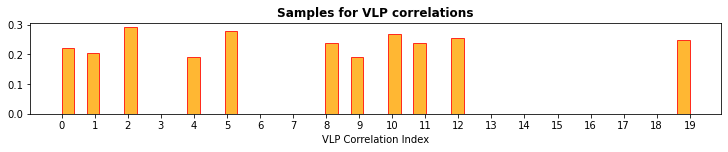

In [8]:
VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
              'Hydro3P']

      

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1

# Plot histogram for Correlations Index
VLP_Index_sample = np.random.choice(VLP_index_list, 1000)
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,2), layout ='constrained')

ax.hist(VLP_Index_sample, bins=50, density=True, align='mid', color=c_orange, alpha=0.8, edgecolor = "red");
ax.set_xlabel('VLP Correlation Index', color='black')
ax.set_title('Samples for VLP correlations', weight='bold', color='black')

x = range(0,20,1);
ax.set_xticks(range(len(x)), x);

<div class="alert alert-success">
<font color='blue'>
 
# 4. Start Calculations for Sensitivity Analysis

1. Generate input variables based on distributions
2. Send the input variables from Jupyter Notebook to Well model (PROSPER)
3. Update Well IPR
4. Calculate Well Model (solve for VLP and IPR)
5. Import results from Well Model (PROSPER) to Jupyter Notebook. Results are saved inside dictionary variables
    
***
</font>   
Cell 23
</div>

In [9]:
def Generate_rand_val(var_name, test_val=0):

    i_mean, i_SD = Input_var_dict[var_name][2], Input_var_dict[var_name][3]
    i_Low_limit, i_High_limit = Input_var_dict[var_name][0], Input_var_dict[var_name][1]
    i_constant = Input_var_dict[var_name][4]
    i_x_Label, i_Title = Input_var_dict[var_name][6], Input_var_dict[var_name][6]
    i_Dist_Type = Input_var_dict[var_name][5]
        
    ## generate data for truncated normal distribution
    if i_Dist_Type == 'Constant':
        NT_Samples = [i_constant]
        
    if i_Dist_Type == 'Uniform':
        NT_Samples = np.random.uniform(low = i_Low_limit, high = i_High_limit, size = 1)
        
    if i_Dist_Type == 'Normal':
        NT_Samples = stats.truncnorm.rvs((i_Low_limit-i_mean)/i_SD,(i_High_limit-i_mean)/i_SD, loc=i_mean, scale=i_SD, size=1)
    
    if var_name=='Perf':
        if test_val < NT_Samples:
            #print(test_val)
            NT_Samples = test_val
    
    #print(NT_Samples)
    
    NT_Samples = np.around(NT_Samples,2)
    my_dict_input_vals[var_name].extend(NT_Samples)
    
    return NT_Samples

In [10]:
def print_input_and_solutions():
    print('Index: ', i)
    print('Reservoir Pressure = ', my_dict_input_vals['Pr'][i])
    print('Drainage Area = ', my_dict_input_vals['DA'][i])
    print('Permeability = ', my_dict_input_vals['k'][i])
    print('Reservoir thickness = ', my_dict_input_vals['h'][i])
    print('Perforation Interval = ', my_dict_input_vals['Perf'][i])
    print('SKIN = ', my_dict_input_vals['S'][i])
    print('WGR = ', my_dict_input_vals['WGR'][i])
    print('Top Node Pressure = ', my_dict_input_vals['Top_Press'][i])
    
    print('VLP Correlation Index = ', VLP_Index_sample, VLP_Index_sample_Name) 
    print('Choke = ', Choke, '\n')
    
    
    print('------')
    
    print('Gas Rate = ', str(round(Gas_Sol,3)), ' MMscfd')
    print('Pressure = ', str(round(BHP_SOL,1)), ' psi')
    print('WHP = ', str(round(WHP_SOL,1)), ' psi')
    print('AOF = ', Gas_AOF) 
    print('------')
    
    if i < iter-1:
        clear_output(wait=True)

In [11]:


iter = 300 ## Set iterations


## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list) # dictionary to save VLP and IPR Curves
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs/Solutions 


## Check if OpenServer Lic is open
if 'c' in locals():
    print('c is active')
else:
    c = OpenServer()
    
c.connect()


n = range(iter)

for i in n:
    
    #print('Index: ', i)
        
    Rand_val = Generate_rand_val('Pr') ## Reservoir Pressure ##
    c.DoSet('PROSPER.SIN.IPR.Single.Pres', Rand_val) # Change variable on PROSPER
    
    Rand_val = Generate_rand_val('DA') ### DRAINAGE AREA ###
    c.DoSet('PROSPER.SIN.IPR.Single.Drainage', Rand_val) # Change variable on PROSPER    
    
    Rand_val = Generate_rand_val('k') ### PERMEABILITY ###
    c.DoSet('PROSPER.SIN.IPR.Single.ResPerm', Rand_val) # Change variable on PROSPER       
    
    Rand_val = Generate_rand_val('h') ### Reservoir Height ###
    c.DoSet('PROSPER.SIN.IPR.Single.Thickness', Rand_val) # Change variable on PROSPER     
    #test_val = Rand_val
    
    Rand_val = Generate_rand_val('Perf', Rand_val) ## Perforation Interval ##
    c.DoSet('PROSPER.SIN.IPR.Single.PerfInt', Rand_val) # Change variable on PROSPER      
   
    Rand_val = Generate_rand_val('S') ### SKIN ###
    c.DoSet('PROSPER.SIN.IPR.Single.Skin', Rand_val) # Change variable on PROSPER    
 
    Rand_val = Generate_rand_val('WGR') ### WGR ###
    c.DoSet('PROSPER.SIN.IPR.Single.WGR', Rand_val) # Change variable on PROSPER  
    c.DoSet('PROSPER.ANL.SYS.WGR', Rand_val) # Change variable on PROSPER  
    
    Rand_val = Generate_rand_val('Top_Press') ### WGR ###
    c.DoSet('PROSPER.ANL.SYS.Pres', Rand_val) # Change variable on PROSPER  

  


    ### VLP Correlation ###
    if VLP_corr_status == True:
        VLP_Index_sample = np.random.choice(VLP_index_list, 1)
        
        
        index_vlp = VLP_index_list.index(VLP_Index_sample)
        VLP_Index_sample_Name = VLP_names[index_vlp]
        VLP_Index_sample_Name =[VLP_Index_sample_Name]
        
        my_dict_input_vals['VLP_Corr'].extend(VLP_Index_sample)
        my_dict_input_vals['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        c.DoSet('PROSPER.ANL.SYS.TubingLabel', VLP_Index_sample)
          
    else:
        my_dict_input_vals['VLP_Corr'].extend(100)
        my_dict_input_vals['VLP_Corr_Name'].extend(100)
        

        
    ### WELL CHOKE ###
    Choke = np.random.choice(Choke_list, 1)      
    my_dict_input_vals['Choke'].extend(Choke)         
    c.DoSet('PROSPER.SIN.EQP.Surf.Data[1].ID', Choke/64)
    
    
    
    ### Calculate new IPR ### Required after changing IPR variables ###
    c.DoCmd('PROSPER.IPR.CALC')
    
    
    
    ## Calculate Well model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution from PROSPER
    ## Some variable strings change based on PROSPER version
    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    #WHP_SOL = c.DoGet('PROSPER.OUT.SYS.SOL[0].WHP')  
    WHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.WHPressure')
    
    Gas_AOF = c.DoGet('Prosper.SIN.IPR.Single.AOF')
    
    
    if Gas_Sol > 1000000:
        Gas_Sol = 0
        BHP_SOL = 0
        WHP_SOL = 0
    
    # Add solutions to dictionary
    my_dict_input_vals['Sol_Gas'].extend([Gas_Sol])
    my_dict_input_vals['FBHP'].extend([BHP_SOL])
    my_dict_input_vals['Sol_WHP'].extend([WHP_SOL])
    
    ## Add  VLP + IPR to Dictionary
    my_dict[str(i) + '_G'].extend(Gas_Curve)
    my_dict[str(i) + '_IPR'].extend(IPR_Curve)
    my_dict[str(i) + '_VLP'].extend(VLP_Curve)
    
    
    # Print values while iterating
    print_input_and_solutions()

    
c.disconnect


Index:  299
Reservoir Pressure =  3699.02
Drainage Area =  701
Permeability =  50.69
Reservoir thickness =  47.27
Perforation Interval =  47.27
SKIN =  41.91
WGR =  487.32
Top Node Pressure =  735.89
VLP Correlation Index =  [5] ['BeggsandBrill']
Choke =  [28] 

------
Gas Rate =  0.0  MMscfd
Pressure =  0.0  psi
WHP =  0.0  psi
AOF =  35.178733826
------


<bound method OpenServer.disconnect of <openserver.openserver.OpenServer object at 0x000002E5719FCCD0>>

<div class="alert alert-success">
<font color='blue'>
    
# Convert dictionaries to Data Frames
    
***
</font>
Cell 26
</div>

In [12]:

df_VLP_IPR = pd.DataFrame(my_dict)                 # VLP and IPR

df_Input_All = pd.DataFrame(my_dict_input_vals)    # Input for all iterations

 # Input for iteration with solution 
df_Input_sol = df_Input_All.copy()
df_Input_sol = df_Input_sol[df_Input_sol['Sol_Gas'] > 0]
df_Input_sol = df_Input_sol.reset_index(drop=True)

# Input for iterations without solution
df_Input_No_sol = df_Input_All.copy()
df_Input_No_sol = df_Input_No_sol[df_Input_No_sol['Sol_Gas'] == 0]
df_Input_No_sol = df_Input_No_sol.reset_index(drop=True)

### Save Data Frames as .csv ###

df_VLP_IPR.to_csv("VLP_IPR.csv",index=False)

df_Input_All.to_csv("Input_ALL_solutiones.csv",index=False)
df_Input_sol.to_csv("Input_with_solutions.csv",index=False)
df_Input_No_sol.to_csv("Input_No_solutions.csv",index=False)



<div class="alert alert-success">
<font color='blue'>
    
# 5. Run the next cell to import saved .csv files
This will allow to continue working with saved results/inputs without running PROSPER again. <br>
It is still requiered to run cell 1 (import libraries)
    
***
</font>
Cell 26
</div>


In [ ]:
df_VLP_IPR = pd.read_csv ('VLP_IPR.csv')                    # VLP and IPR

df_Input_All = pd.read_csv ('Input_ALL_solutiones.csv')     # Input for all iterations
df_Input_sol = pd.read_csv ('Input_with_solutions.csv')     # Input for iteration with solution 
df_Input_No_sol = pd.read_csv ('Input_No_solutions.csv')    # Input for iterations without solution

i = df_QP_All.shape[0]
print('No. Iterations = ',i)

<div class="alert alert-success">
<font color='blue'>
    
# 6. Check Info and Values
    
***
</font>
Cell 26
</div>

In [13]:
display(Markdown(f"## Info + Values - All Iterations"))
df_Input_All.info()
display(df_Input_All.head(i+1).round(2))
print(' ')

display(Markdown(f"## Info + Values - Solutions"))
df_Input_sol.info()
display(df_Input_sol.head(i+1).round(2))
print(' ')

display(Markdown(f"## Info + Values - NO Solutions"))
df_Input_No_sol.info()
df_Input_No_sol.head(i+1).round(2)

## Info + Values - All Iterations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             300 non-null    float64
 1   DA             300 non-null    int32  
 2   k              300 non-null    float64
 3   h              300 non-null    float64
 4   Perf           300 non-null    float64
 5   S              300 non-null    float64
 6   WGR            300 non-null    float64
 7   Top_Press      300 non-null    float64
 8   VLP_Corr       300 non-null    int32  
 9   VLP_Corr_Name  300 non-null    object 
 10  Choke          300 non-null    int32  
 11  Sol_Gas        300 non-null    float64
 12  FBHP           300 non-null    float64
 13  Sol_WHP        300 non-null    float64
dtypes: float64(10), int32(3), object(1)
memory usage: 29.4+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP
0,3660.80,701,53.01,26.70,26.70,33.98,497.76,898.88,5,BeggsandBrill,28,0.00,0.00,0.00
1,4008.47,701,50.45,42.31,42.31,41.37,323.43,360.96,0,DunsandRosModified,28,2.71,3827.06,1316.21
2,4249.46,701,43.25,76.29,73.36,30.95,249.18,675.55,9,Orkiszewski,28,2.30,4173.57,1031.45
3,4165.47,701,45.20,67.70,67.70,47.23,445.88,857.39,5,BeggsandBrill,28,0.00,0.00,0.00
4,4033.56,701,52.63,73.64,61.15,30.87,484.71,945.96,5,BeggsandBrill,28,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4154.30,701,47.61,39.67,39.67,15.45,455.52,302.29,11,DunsandRosOriginal,28,1.95,4087.79,1088.65
296,4036.29,701,46.21,76.97,60.90,30.61,247.62,849.34,0,DunsandRosModified,28,3.48,3928.63,1542.33
297,4232.36,701,45.91,26.91,26.91,46.40,162.71,726.16,4,MukerjeeBrill,28,4.24,3691.57,1615.40
298,3904.49,701,52.11,60.20,60.20,43.80,225.96,801.76,5,BeggsandBrill,28,2.77,3771.11,1197.12


## Info + Values - Solutions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             263 non-null    float64
 1   DA             263 non-null    int32  
 2   k              263 non-null    float64
 3   h              263 non-null    float64
 4   Perf           263 non-null    float64
 5   S              263 non-null    float64
 6   WGR            263 non-null    float64
 7   Top_Press      263 non-null    float64
 8   VLP_Corr       263 non-null    int32  
 9   VLP_Corr_Name  263 non-null    object 
 10  Choke          263 non-null    int32  
 11  Sol_Gas        263 non-null    float64
 12  FBHP           263 non-null    float64
 13  Sol_WHP        263 non-null    float64
dtypes: float64(10), int32(3), object(1)
memory usage: 25.8+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP
0,4008.47,701,50.45,42.31,42.31,41.37,323.43,360.96,0,DunsandRosModified,28,2.71,3827.06,1316.21
1,4249.46,701,43.25,76.29,73.36,30.95,249.18,675.55,9,Orkiszewski,28,2.30,4173.57,1031.45
2,4440.18,701,43.92,30.76,30.76,39.26,454.41,377.56,2,FancherBrown,28,3.10,4136.57,1783.04
3,4370.82,701,35.47,52.65,52.65,41.17,89.56,426.10,0,DunsandRosModified,28,6.31,3898.81,2057.39
4,4222.12,701,58.26,75.82,72.06,34.86,342.05,852.08,11,DunsandRosOriginal,28,2.65,4149.96,1340.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,3854.47,701,51.39,33.80,33.80,33.62,222.44,327.20,1,HagedornBrown,28,3.69,3595.38,1557.87
259,4154.30,701,47.61,39.67,39.67,15.45,455.52,302.29,11,DunsandRosOriginal,28,1.95,4087.79,1088.65
260,4036.29,701,46.21,76.97,60.90,30.61,247.62,849.34,0,DunsandRosModified,28,3.48,3928.63,1542.33
261,4232.36,701,45.91,26.91,26.91,46.40,162.71,726.16,4,MukerjeeBrill,28,4.24,3691.57,1615.40


## Info + Values - NO Solutions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             37 non-null     float64
 1   DA             37 non-null     int32  
 2   k              37 non-null     float64
 3   h              37 non-null     float64
 4   Perf           37 non-null     float64
 5   S              37 non-null     float64
 6   WGR            37 non-null     float64
 7   Top_Press      37 non-null     float64
 8   VLP_Corr       37 non-null     int32  
 9   VLP_Corr_Name  37 non-null     object 
 10  Choke          37 non-null     int32  
 11  Sol_Gas        37 non-null     float64
 12  FBHP           37 non-null     float64
 13  Sol_WHP        37 non-null     float64
dtypes: float64(10), int32(3), object(1)
memory usage: 3.7+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP
0,3660.80,701,53.01,26.70,26.70,33.98,497.76,898.88,5,BeggsandBrill,28,0.0,0.0,0.0
1,4165.47,701,45.20,67.70,67.70,47.23,445.88,857.39,5,BeggsandBrill,28,0.0,0.0,0.0
2,4033.56,701,52.63,73.64,61.15,30.87,484.71,945.96,5,BeggsandBrill,28,0.0,0.0,0.0
3,3641.64,701,51.57,34.45,34.45,34.81,162.53,251.77,9,Orkiszewski,28,0.0,0.0,0.0
4,3737.53,701,52.76,71.61,70.28,40.35,188.53,470.66,5,BeggsandBrill,28,0.0,0.0,0.0
5,3782.63,701,56.52,62.09,62.09,49.30,414.37,613.97,5,BeggsandBrill,28,0.0,0.0,0.0
6,3613.91,701,49.74,71.62,68.35,47.48,237.39,319.37,9,Orkiszewski,28,0.0,0.0,0.0
7,3688.94,701,47.99,61.80,61.80,42.31,138.79,772.86,9,Orkiszewski,28,0.0,0.0,0.0
8,3703.02,701,55.50,27.47,27.47,39.58,384.61,549.32,11,DunsandRosOriginal,28,0.0,0.0,0.0
9,3589.91,701,59.98,78.39,56.13,42.37,369.17,993.79,0,DunsandRosModified,28,0.0,0.0,0.0


<div class="alert alert-success">
<font color='blue'>
    
# 6. Check Statistics
    
***
</font>
Cell 26
</div>

In [14]:
## Show how many solutions are = 0
Iterations_No_Sol = (df_Input_All['Sol_Gas'] == 0).sum()
It_with_Sol = (df_Input_All['Sol_Gas'] > 0).sum()

perc_No_Sol = Iterations_No_Sol/(Iterations_No_Sol+It_with_Sol)*100
perc_with_Sol = 100 - perc_No_Sol

print('* Total Iterations = ', i+1)
print('* Iterations NO Solution =', Iterations_No_Sol, '(',perc_No_Sol.round(2),'%)' )
print('* Iterations with Solution =', It_with_Sol, '(',perc_with_Sol.round(2),'%)' )


### Compare Stadistics ###
CL1 = df_Input_All.columns.tolist()
CL2 = df_Input_sol.columns.tolist()
CL3 = df_Input_No_sol.columns.tolist()
CL1.remove('VLP_Corr_Name')
CL2.remove('VLP_Corr_Name')
CL3.remove('VLP_Corr_Name')

df1 = pd.DataFrame(df_Input_All.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL1)
df2 = pd.DataFrame(df_Input_sol.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL2)
df3 = pd.DataFrame(df_Input_No_sol.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL3)


display(Markdown(f"## Statistics - All Iterations"))
display(df1.round(2))
print(' ')
display(Markdown(f"## Statistics - Solutions"))
display(df2.round(2))
print(' ')
display(Markdown(f"## Statistics - NO Solutions"))
display(df3.round(2))


* Total Iterations =  300
* Iterations NO Solution = 37 ( 12.33 %)
* Iterations with Solution = 263 ( 87.67 %)


## Statistics - All Iterations

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP
count,300.00,300.0,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.0,300.00,300.00,300.00
mean,3990.66,701.0,50.21,54.19,49.70,36.44,252.79,627.31,6.93,28.0,3.57,3317.25,1421.04
std,300.42,0.0,4.96,20.30,16.15,8.09,144.73,215.14,5.55,0.0,2.09,1285.83,632.37
min,3512.31,701.0,34.34,20.01,20.01,13.04,5.06,251.77,0.00,28.0,0.00,0.00,0.00
10%,3594.42,701.0,43.46,26.44,26.44,24.83,53.28,341.06,0.00,28.0,0.00,0.00,0.00
20%,3665.55,701.0,46.08,31.82,31.82,29.77,103.86,408.39,1.00,28.0,2.31,3354.26,1154.88
40%,3878.32,701.0,48.90,47.58,47.58,34.79,198.35,551.78,4.60,28.0,2.84,3574.27,1401.45
50%,3974.62,701.0,50.60,55.67,52.21,37.82,249.79,624.86,5.00,28.0,3.31,3712.78,1529.34
60%,4083.36,701.0,51.58,61.62,55.77,39.67,307.48,716.25,8.00,28.0,3.76,3844.88,1633.64
80%,4322.71,701.0,54.41,75.59,63.39,43.87,400.74,846.26,11.00,28.0,5.35,4087.96,1918.61


## Statistics - Solutions

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP
count,263.00,263.0,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.0,263.00,263.00,263.00
mean,4019.64,701.0,50.06,53.42,49.05,36.12,245.42,616.27,6.83,28.0,4.07,3783.94,1620.96
std,301.44,0.0,4.98,20.28,16.17,8.30,144.94,210.44,5.83,0.0,1.72,337.91,362.04
min,3516.64,701.0,34.34,20.01,20.01,13.04,5.06,252.59,0.00,28.0,1.30,2435.29,709.55
10%,3612.13,701.0,43.35,25.83,25.83,24.53,49.89,340.68,0.00,28.0,2.36,3375.33,1172.31
20%,3693.38,701.0,45.94,31.33,31.33,28.81,90.32,405.87,1.00,28.0,2.61,3468.44,1309.67
40%,3914.69,701.0,48.82,45.64,45.64,34.57,183.66,541.65,4.00,28.0,3.19,3686.45,1498.44
50%,4025.81,701.0,50.56,55.06,51.47,37.29,247.62,612.02,5.00,28.0,3.56,3801.17,1584.82
60%,4148.86,701.0,51.54,60.96,54.80,39.53,297.69,699.25,8.00,28.0,4.22,3908.71,1682.50
80%,4352.00,701.0,54.27,75.23,62.25,43.80,396.68,818.81,11.00,28.0,5.58,4121.72,1963.54


## Statistics - NO Solutions

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP
count,37.00,37.0,37.00,37.00,37.00,37.00,37.00,37.00,37.00,37.0,37.0,37.0,37.0
mean,3784.69,701.0,51.27,59.69,54.27,38.66,305.21,705.76,7.62,28.0,0.0,0.0,0.0
std,196.36,0.0,4.70,19.86,15.47,6.10,133.63,234.37,2.70,0.0,0.0,0.0,0.0
min,3512.31,701.0,39.68,22.31,22.31,24.35,83.70,251.77,0.00,28.0,0.0,0.0,0.0
10%,3586.58,701.0,46.13,28.74,28.74,31.47,125.27,374.64,5.00,28.0,0.0,0.0,0.0
20%,3602.03,701.0,47.32,45.66,45.66,33.16,189.67,480.43,5.00,28.0,0.0,0.0,0.0
40%,3692.97,701.0,49.73,57.30,54.27,37.51,252.34,629.29,6.60,28.0,0.0,0.0,0.0
50%,3739.43,701.0,51.57,61.80,57.10,38.94,306.97,735.89,9.00,28.0,0.0,0.0,0.0
60%,3808.05,701.0,52.83,69.12,60.77,40.61,353.03,825.13,9.00,28.0,0.0,0.0,0.0
80%,3966.31,701.0,55.46,77.84,65.93,44.21,459.49,945.92,9.00,28.0,0.0,0.0,0.0


In [15]:
### Check if perforation values are less than reservoir thickness (h). Minimum value must be 0.
h_perf = df_Input_All['h'] - df_Input_All['Perf']
h_perf.describe()


count    300.000000
mean       4.491900
std        8.188193
min        0.000000
25%        0.000000
50%        0.000000
75%        5.175000
max       34.070000
dtype: float64

<div class="alert alert-success"> <font color='blue'>
    
# 6. ANALYZE RESULTS -  PRESSURE/GAS RATE @ Solution Node
Cell 28
***
</font> </div>

In [ ]:
# RUN MULTIPLE CELLS
Javascript("Jupyter.notebook.execute_cell_range(31,46)")

## Iterations with and without solution (VLP/IPR intersection)
    There are 2 dictionaries/DataFrames containing the results
    df_QP_All = All iterations
    df_QP_sol = Iterations with solution (Qg > 0)

(2435.293212891, 4485.08470459035)

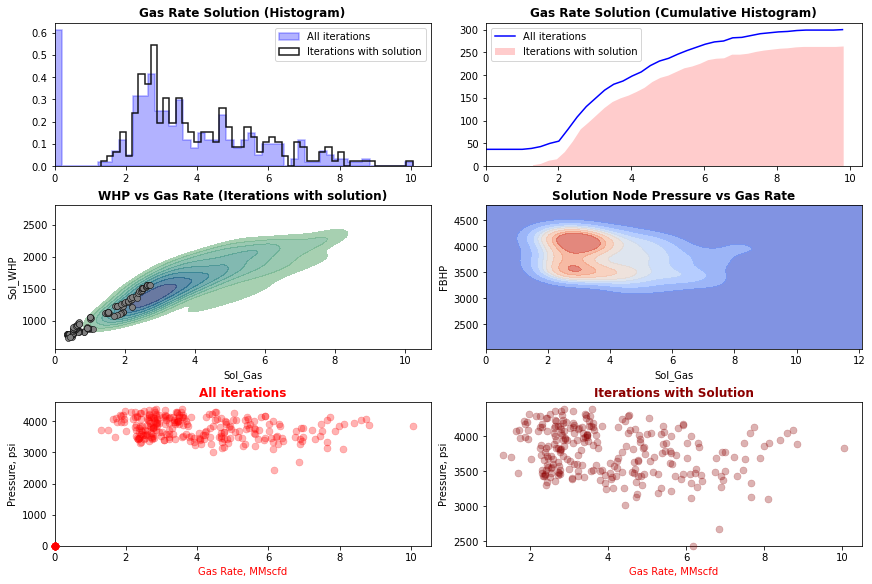

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(12,8), layout ='constrained')

plot_i = 0
ax[plot_i,0].hist(df_Input_All['Sol_Gas'], bins=50, density=True, align='mid', color=c_blue, alpha=0.3, edgecolor = "blue", 
                  linewidth=1.5, cumulative=False, histtype='stepfilled', label='All iterations')
ax[plot_i,0].set_title('Gas Rate Solution (Histogram)', weight='bold', color='black')


# Plot Gas values for iterations with solution
ax[plot_i,0].hist(df_Input_sol['Sol_Gas'], bins=50, density=True, align='mid', color=c_orange, alpha=0.9, edgecolor = "black",
                 linewidth=1.5, cumulative=False, histtype='step', label='Iterations with solution')
ax[plot_i,1].set_title('Gas Rate Solution (Cumulative Histogram)', weight='bold', color='black')

ax[plot_i,0].set_xlim(left=0)
ax[plot_i,0].set_ylim(bottom=0)
ax[plot_i,0].legend()


### Cumulative Histogram ###
C_values, base = np.histogram(df_Input_All['Sol_Gas'], bins=40)
cumulative = np.cumsum(C_values)

plot_i = 0
ax[plot_i,1].plot(base[:-1], cumulative, c='blue', linewidth=1.5, label='All iterations')


C_values, base = np.histogram(df_Input_sol['Sol_Gas'], bins=40)
cumulative = np.cumsum(C_values)

#ax[plot_i,1].plot(base[:-1], cumulative, c='red', linewidth=1.5, label='Iterations with solution')
ax[plot_i,1].fill_between(base[:-1], cumulative, facecolor='red', linewidth=1.5, label='Iterations with solution', alpha=0.2)

ax[plot_i,1].set_xlim(left=0)
ax[plot_i,1].set_ylim(bottom=0)
ax[plot_i,1].legend()



### Density Map ###
sns.kdeplot(data=df_Input_sol, x="Sol_Gas", y="Sol_WHP", fill=True, alpha=0.7, cut=1, ax=ax[1,0], 
            cmap='crest', label='PROSPER density map', thresh=0)

ax[1,0].set_title('WHP vs Gas Rate (Iterations with solution)', weight='bold', color='black')

### Test Data
ax[1,0].scatter(data= df_PDP_hist, x='Gas', y='WHP', color='gray',edgecolors= "black",linewidth=0.5, label='Production Test')
#ax[1,0].legend()

ax[1,0].collections[0].set_alpha(0)

sns.kdeplot(data=df_Input_sol, x="Sol_Gas", y="FBHP", fill=True, alpha=0.7, ax=ax[1,1], 
            cmap='coolwarm', label='PROSPER density map', thresh=0)

ax[1,1].set_title('Solution Node Pressure vs Gas Rate', weight='bold', color='black')

ax[1,0].set_xlim(left=0)
ax[1,1].set_xlim(left=0)



### Scatter Plots
plot_i = 2
ax[plot_i,0].scatter(df_Input_All['Sol_Gas'], df_Input_All['FBHP'],  label='Solutions', color=c_red, alpha=0.3,s= 50,
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[plot_i,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[plot_i,0].set_ylabel('Pressure, psi')
ax[plot_i,0].set_title('All iterations', weight='bold', color=c_red)
ax[plot_i,0].set_xlim(left=0)
ax[plot_i,0].set_ylim(bottom=0)


ax[plot_i,1].scatter(df_Input_sol['Sol_Gas'], df_Input_sol['FBHP'],  
           label='Solutions', color=c_Dred, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[plot_i,1].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[plot_i,1].set_ylabel('Pressure, psi')
ax[plot_i,1].set_title('Iterations with Solution', weight='bold', color=c_Dred)

ax[plot_i,1].set_ylim(bottom=0)
pmin =df_Input_sol['FBHP'].min()
ax[plot_i,1].set_ylim(bottom=pmin)

<div class="alert alert-success">
<font color='blue'>
    
# QC SOLUTION (P vs Qg) Data Generated with loop
  
***
</font>
Cell 39
</div>


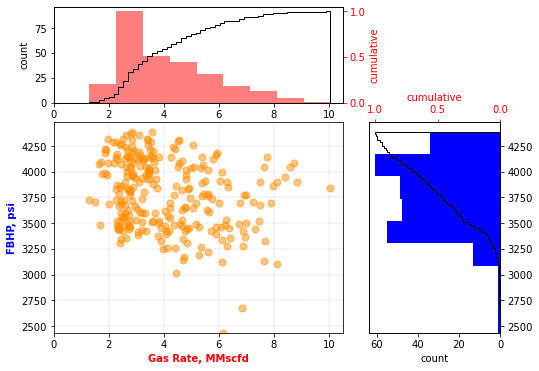

In [17]:
import matplotlib.gridspec as gridspec


x = df_Input_sol['Sol_Gas']
y = df_Input_sol['FBHP']

fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(3, 3)

ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5)

ax_main.set_xlabel('Gas Rate, MMscfd', color=c_red, weight='bold')
ax_main.set_ylabel('FBHP, psi', color=c_blue, weight='bold')

ax_main.set_axisbelow(True)
ax_main.grid(color = c_black, linestyle = '--', linewidth = 0.1, zorder=1)

ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)
ax_main.set_ylim(bottom=pmin)

## Gas Rate Distribution ##
ax_xDist.hist(x,bins=int(iter/33),align='mid', color=c_red, alpha=0.5)
ax_xDist.set(ylabel='count')

ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=50,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

## Pressure Distribution ##
ax_yDist.hist(y,bins=int(iter/33),orientation='horizontal',align='mid', color=c_blue)
ax_yDist.set(xlabel='count')

ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True, histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

ax_yDist.invert_xaxis()
ax_yDist.yaxis.tick_right()
ax_yCumDist.invert_xaxis()

plt.show()

<div class="alert alert-success">
<font color='blue'>
    
# Solution (Qg) vs correlation
  
***
</font> </div>

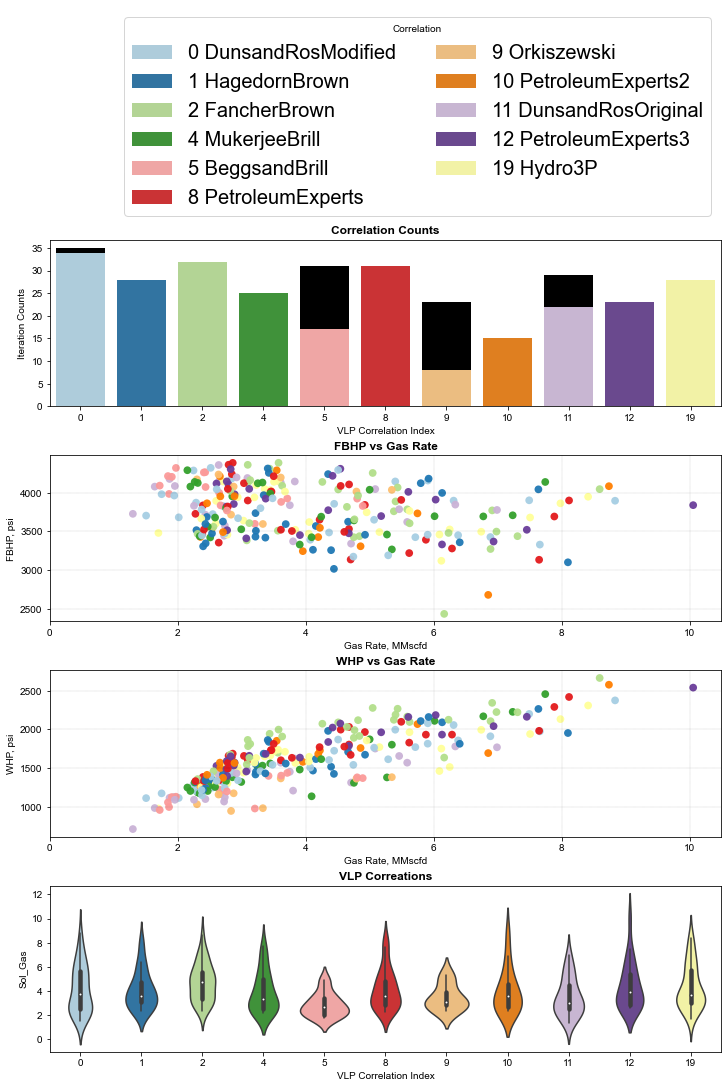

In [18]:
VLP_index_name =[]
xii  = 0
for xi in VLP_names:   
    vlp_val = str(VLP_index_list[xii]) + ' ' +  str(VLP_names[xii])
    VLP_index_name.append(vlp_val)
    xii = xii + 1
    
 
x = df_Input_sol['Sol_Gas']
y = df_Input_sol['FBHP']
y2 = df_Input_sol['Sol_WHP']
xc = df_Input_sol['VLP_Corr']



fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(10,15), layout ='constrained')

Pal = "Paired"

# --- Plot 0 ---
nplot = ax[0]

sns.countplot(ax =nplot, x=df_Input_sol['VLP_Corr'], palette = Pal, hue = xc, dodge=False)
sns.countplot(ax =nplot, x=df_Input_sol['VLP_Corr'], color='white', dodge=False, alpha=1)
sns.move_legend(nplot, "upper left", bbox_to_anchor=(0, 1))
nplot.legend(title='Correlation',labels=VLP_index_name, facecolor='white', ncol=2, fontsize="20")



nplot.set_xlabel('')
nplot.set_ylabel('')
nplot.axis('off')


# --- Plot 1 ---
nplot = ax[1]

s1 = df_Input_All.pivot_table(columns=['VLP_Corr'], aggfunc='size')
s2 = df_Input_sol.pivot_table(columns=['VLP_Corr'], aggfunc='size')
sns.barplot(ax =nplot, x=s1.index, y=s1.values, color= 'black', alpha=1, dodge=False)
sns.barplot(ax =nplot, x=s2.index, y=s2.values, palette = Pal, hue =s2.index, dodge=False)
nplot.legend_.remove()

nplot.set_title('Correlation Counts', weight='bold', color=c_black)
nplot.set_xlabel('VLP Correlation Index')
nplot.set_ylabel('Iteration Counts')


sns.set_style("white")

nplot = ax[2]
sns.scatterplot(ax=nplot, x = x, y = y, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('FBHP vs Gas Rate', weight='bold', color=c_black)
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('FBHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

nplot = ax[3]
sns.scatterplot(ax=nplot, x = x, y = y2, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('WHP vs Gas Rate', weight='bold', color=c_black)
xLabel = 'Gas Rate, MMscfd', '\n'
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('WHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

nplot = ax[4]
sns.violinplot(ax = nplot, x = xc, y = x,  palette=Pal, legend=False)
nplot.set_title('VLP Correations', weight='bold', color=c_black)
nplot.set_xlabel('VLP Correlation Index');




Text(0.5, 0.98, ' PROSPER results (density map) vs Production Test data ')

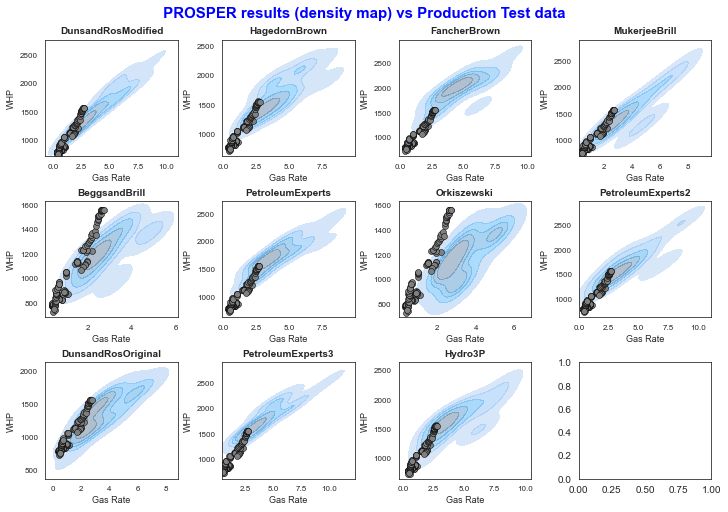

In [19]:
import math

count_corr = len(VLP_index_list)/4

fig, ax = plt.subplots(nrows = math.ceil(count_corr), ncols=4, figsize=(10,7), layout ='constrained')

pcol = 0
prow = 0
corrL = 0
for xi in VLP_index_list:   
    #print(xi)

    df1 = df_Input_sol.loc[df_Input_sol['VLP_Corr'] == xi ]

    sns.kdeplot(data=df1, x="Sol_Gas", y="Sol_WHP", levels=6, fill=True, alpha=0.4, cut=2, ax=ax[prow,pcol], 
                label='PROSPER density map')

    ax[prow,pcol].scatter(data= df_PDP_hist, x='Gas', y='WHP', color='gray',edgecolors= "black",linewidth=0.5, label='Production Test')
    ax[prow,pcol].set_title(VLP_names[corrL], weight='bold', fontsize=10)
    ax[prow,pcol].set_ylabel('WHP', fontsize=9)
    ax[prow,pcol].set_xlabel('Gas Rate', fontsize=9)
    ax[prow,pcol].tick_params(axis='both', which='major', labelsize=8)
    
    pcol = pcol + 1
    corrL = corrL+1
    if pcol >3:
        pcol = 0
        prow = prow + 1

fig.suptitle(' PROSPER results (density map) vs Production Test data ', fontsize=15, weight='bold', color='blue')

<div class="alert alert-success">
<font color='black'>
    
# OUTLIERS 
  
Based on above distributions delete outliers. <br>
Specify low and high percentile to drop rows outside the limits
</font>
</div>

In [ ]:

Qg_mean = df_QP_sol['Sol_Gas'].mean()
P_mean = df_QP_sol['Sol_Pressure'].mean()

Max_P_to_drop_vals = 98
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Max_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas > pval_to_drop].index, inplace=True)


Min_P_to_drop_vals = 2
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Min_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas < pval_to_drop].index, inplace=True)


### Compare Stadistics ###
dfS_col_names =df_QP_All.columns.tolist()
dfS_In_col_names =df_QP_sol.columns.tolist()

df1 = pd.DataFrame(df_QP_All.describe(), columns=dfS_col_names)
df2 = pd.DataFrame(df_QP_sol.describe(), columns=dfS_In_col_names)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

p = np.percentile(df_QP_sol['Sol_Gas'], 1)
print ("Percentile 1 = ", p)
p = np.percentile(df_QP_sol['Sol_Gas'], 95)
print ("Percentile 95 = ", p)

<div class="alert alert-success">
<font color='blue'>
    
# 7. ANALYZE INPUT VALUES
#### CELL 46
***
</font>
</div>


In [ ]:
## RUN MULTIPLE CELLS ##
#Javascript("Jupyter.notebook.execute_cell_range(40,51)")

## Plot Distribution for input variables (Iterations with Solution)

Total Input Variables =  14
Rows to Plot =  6.0
Plot Distribution for input variables (Iterations with Solution)


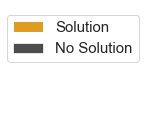

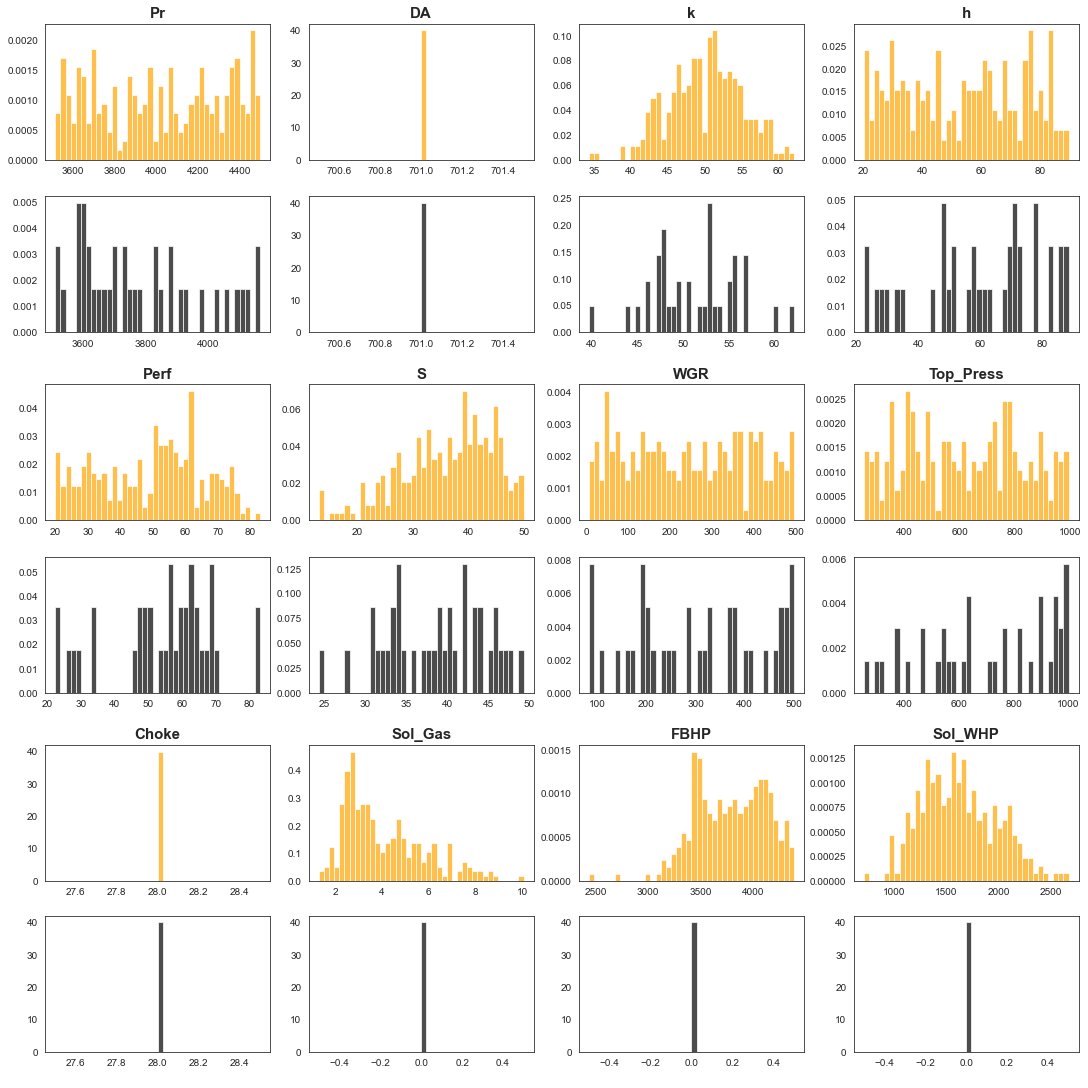

In [20]:
## Create Legend
fig, ax= plt.subplots(nrows = 1, ncols=1, figsize=(1,2))

sns.countplot(ax =ax, x=[1], color=c_orange, dodge=False, alpha=1)
sns.countplot(ax =ax, x=[1], color=c_LDark, dodge=False, alpha=0.7)
sns.countplot(ax =ax, x=[1], color='white', dodge=False, alpha=1)
#sns.move_legend(nplot, "upper left", bbox_to_anchor=(0, 1))
ax.legend(title='',labels=['Solution', 'No Solution'], facecolor='white', fontsize="15")
#ax.legend(["Solution", "No Solution"])
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis('off')


## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
n_rows = 4
while (n_rows < chart_n-2):
    n_rows = n_rows + 4
    
n_rows = (n_rows/4)*2
print("Rows to Plot = ",n_rows)

n_bins = 40

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows)-0, ncols=4, figsize=(15,15), layout ='constrained')

n = range(chart_n)

yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_col_names_Inputs[ii])
    if (df_col_names_Inputs[ii] == 'VLP_Corr' or df_col_names_Inputs[ii] == 'VLP_Corr_Name'):
        df_col_names_Inputs[ii]
    else:    
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', color=c_orange, alpha=0.7)
        
        AX[xx,yy].set_title(df_col_names_Inputs[ii], weight='bold', fontsize=15)
        AX[xx,yy].set_xlabel(' ')
        AX[xx,yy].set_ylabel('')
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
        
        AX[xx+1,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', color=c_LDark, alpha=0.7)
        AX[xx+1,yy].set_xlabel(' ')
        
        yy = yy + 1
        cc = cc + 1

        if cc > 3:
            cc = 0
            yy = 0
            xx = xx + 2

print('Plot Distribution for input variables (Iterations with Solution)')

## Plot Distributions with solution and without solution next to each other

Total Input Variables =  14
Rows to Plot =  5


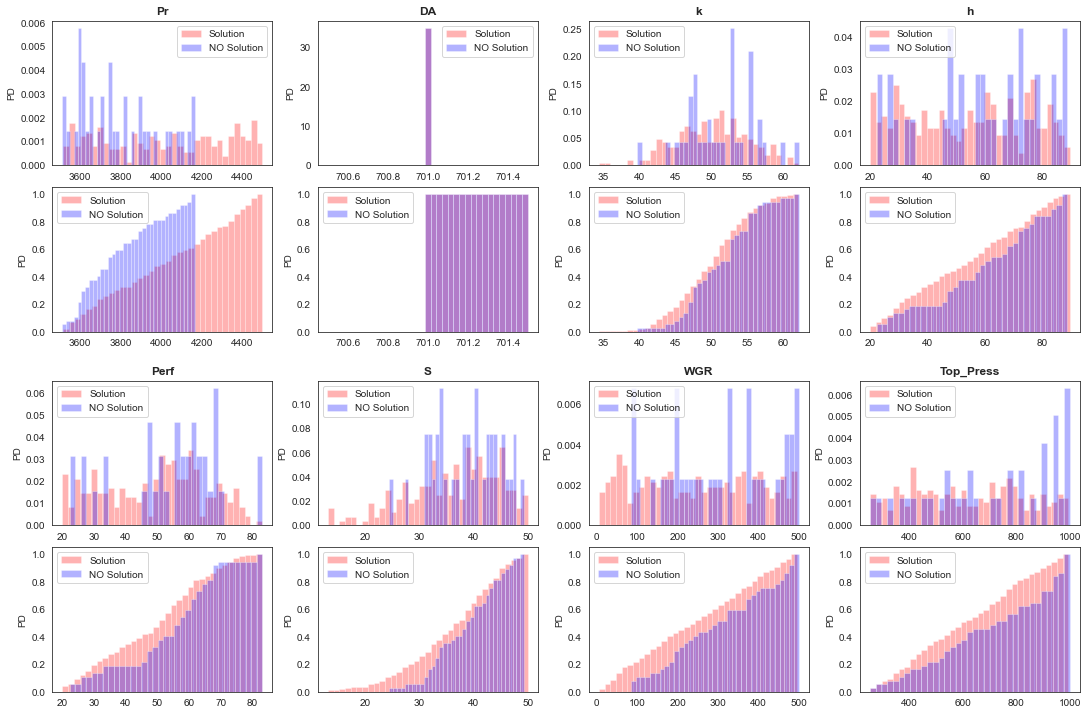

In [21]:
## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = 4, ncols=4, figsize=(15,10), layout ='constrained')

yy = 0
xx = 0
cc = 0
n_bins = 35

for ii in range(8):
  

    if (df_Input_sol.columns[ii] == 'VLP_Corr_Name' or df_Input_sol.columns[ii] == 'VLP_Corr' \
        or df_Input_sol.columns[ii] == 'Sol_Gas' or df_Input_sol.columns[ii] == 'Sol_Pressure'):
        if1 = 0
    else:
        #print(df_Input_sol.columns[ii])
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=False)

        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_ylabel('PD')

        AX[xx,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=False)

        #AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_xlabel('')
        AX[xx,yy].legend()
        AX[xx,yy].set_title(df_col_names_Inputs[ii], weight='bold', fontsize=12)
        
        ### Plot Cumulatives ###
        AX[xx+1,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx+1,yy].set_ylabel('PD')

        AX[xx+1,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(' ')
        AX[xx+1,yy].legend()
        
        #plt.legend()
        yy = yy + 1
        cc = cc + 1

        if cc > 3:
            cc = 0
            yy = 0
            xx = xx + 2

<font color='blue'>
    
# Compare distributions using Two-Sample Kolmogorov-Smirnov test

    
***
</font>

The null hypothesis (H<sub> 0 </sub>)  is that 2 independent samples are drawn from the same continuous distribution.
. <br>
p-value < 0.05: significant difference between the two distributions



In [22]:
# Create DataFrame to contain KS results
df_KS_test = pd.DataFrame(columns = ['Variable Name', 'Statistic', 'p value', 'Result'])
#print(type(n))

for ii in n:
    test_vals = stats.ks_2samp(df_Input_sol[df_col_names_Inputs[ii]],df_Input_No_sol[df_col_names_Inputs[ii]])
    #print(df_col_names_Inputs[ii])
    print(df_col_names_Inputs[ii], ' = ', test_vals)
    
    a = df_col_names_Inputs[ii]
    b = round(test_vals[0],4)
    cx = round(test_vals[1],6)
    
    if cx < 0.05:
        d = 'H0 rejected, Significant difference'
    else:
        d = 'H0 not rejected'
    df_KS_test.loc[len(df_KS_test.index)] = [a,b,cx,d]
    
df_KS_test

def highlight(s):
    if s.Result != 'H0 not rejected':
        return ['background-color: yellow'] * len(s)
    else:
        return ['background-color: white'] * len(s)

df_KS_test.style.apply(highlight, axis=1)

Pr  =  KstestResult(statistic=0.38022813688212925, pvalue=0.00010191529433178914)
DA  =  KstestResult(statistic=0.0, pvalue=1.0)
k  =  KstestResult(statistic=0.1614428116329257, pvalue=0.32712105981691253)
h  =  KstestResult(statistic=0.21005035453704654, pvalue=0.09751985763900906)
Perf  =  KstestResult(statistic=0.21436645771246532, pvalue=0.08605637765553242)
S  =  KstestResult(statistic=0.20069879765697257, pvalue=0.12587191139281595)
WGR  =  KstestResult(statistic=0.21765491727468914, pvalue=0.07833648772700808)
Top_Press  =  KstestResult(statistic=0.24488747302435515, pvalue=0.03327897623095599)
VLP_Corr  =  KstestResult(statistic=0.4254444558627068, pvalue=7.9576576669238e-06)
VLP_Corr_Name  =  KstestResult(statistic=0.3170280546706402, pvalue=0.0021234583040283805)
Choke  =  KstestResult(statistic=0.0, pvalue=1.0)
Sol_Gas  =  KstestResult(statistic=1.0, pvalue=3.3306690738754696e-16)
FBHP  =  KstestResult(statistic=1.0, pvalue=3.3306690738754696e-16)
Sol_WHP  =  KstestResult(st

,Variable Name,Statistic,p value,Result
0,Pr,0.380200,0.000102,"H0 rejected, Significant difference"
1,DA,0.000000,1.000000,H0 not rejected
2,k,0.161400,0.327121,H0 not rejected
3,h,0.210100,0.097520,H0 not rejected
4,Perf,0.214400,0.086056,H0 not rejected
5,S,0.200700,0.125872,H0 not rejected
6,WGR,0.217700,0.078336,H0 not rejected
7,Top_Press,0.244900,0.033279,"H0 rejected, Significant difference"
8,VLP_Corr,0.425400,0.000008,"H0 rejected, Significant difference"
9,VLP_Corr_Name,0.317000,0.002123,"H0 rejected, Significant difference"


<font color='blue'>
    
# 8. Create cross-plots input vs solutions
CELL 51
***
</font>



In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(56,61)")

In [23]:
## Get Column names
df_col_names =df_VLP_IPR.columns.tolist()
df_col_names_In = df_Input_All.columns.tolist()
print(df_col_names_In)

['Pr', 'DA', 'k', 'h', 'Perf', 'S', 'WGR', 'Top_Press', 'VLP_Corr', 'VLP_Corr_Name', 'Choke', 'Sol_Gas', 'FBHP', 'Sol_WHP']


## Cross-plots for all Iterations

Total Input Variables =  14
Rows to Plot =  5


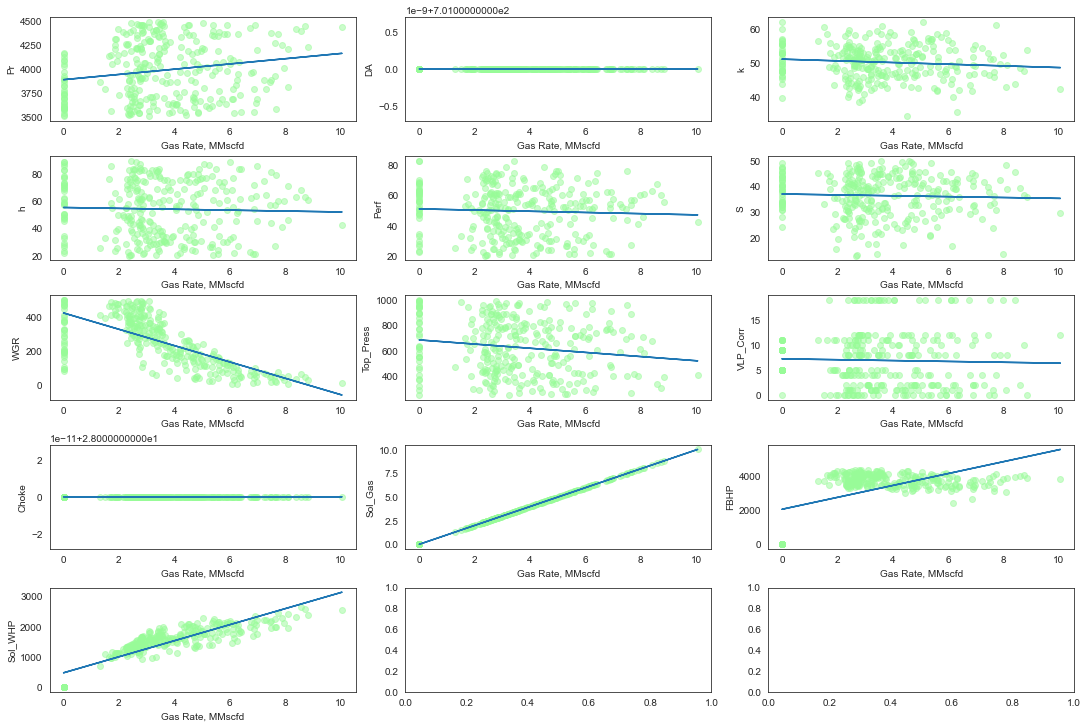

In [24]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_Input_All.columns[ii])
    
    if df_Input_All.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_Input_All['Sol_Gas'], df_Input_All[df_col_names_In[ii]], color=c_pale_green, alpha=0.5)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_Input_All['Sol_Gas']
        y = df_Input_All[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-')

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1


## Cross-Plots for Iterations with solutions

Total Input Variables =  14
Rows to Plot =  5


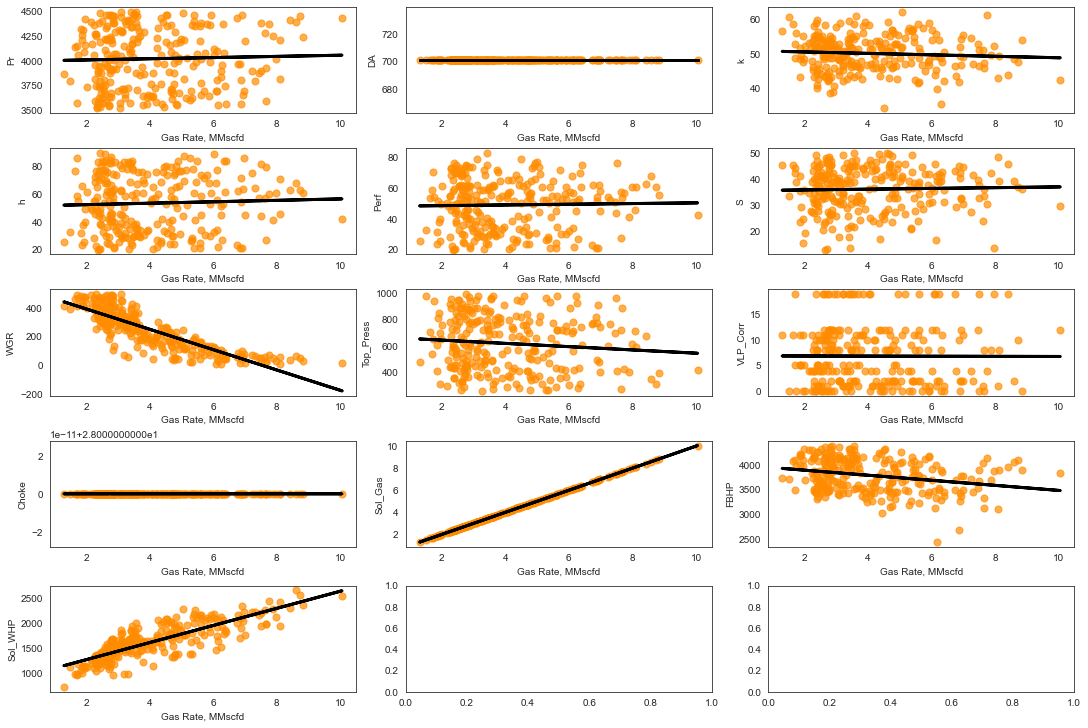

In [25]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(ii)
    if df_Input_sol.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_Input_sol['Sol_Gas'], df_Input_sol[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7, s = 50)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_Input_sol['Sol_Gas']
        y = df_Input_sol[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-', linewidth=3, color = c_black)

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1

<font color='blue'>
    
# 9. CALCULATE CORRELATION COEFFICIENTS
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(61,66)")

In [26]:
# Create new DF to delete Correlation name
corr_DF = df_Input_All.copy(deep=True)
corr_DF.drop(['VLP_Corr_Name'], axis=1, inplace=True) # delete Correlation name (string variable)
## Check statistics for new DataFrame
corr_DF.describe().round(2)

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP
count,300.00,300.0,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.0,300.00,300.00,300.00
mean,3990.66,701.0,50.21,54.19,49.70,36.44,252.79,627.31,6.93,28.0,3.57,3317.25,1421.04
std,300.42,0.0,4.96,20.30,16.15,8.09,144.73,215.14,5.55,0.0,2.09,1285.83,632.37
min,3512.31,701.0,34.34,20.01,20.01,13.04,5.06,251.77,0.00,28.0,0.00,0.00,0.00
25%,3705.60,701.0,46.74,34.82,34.82,31.32,129.82,434.13,2.00,28.0,2.43,3428.99,1235.66
50%,3974.62,701.0,50.60,55.67,52.21,37.82,249.79,624.86,5.00,28.0,3.31,3712.78,1529.34
75%,4252.29,701.0,53.47,71.86,61.53,42.71,374.40,798.25,11.00,28.0,4.84,4040.61,1814.35
max,4497.47,701.0,62.10,89.58,83.08,49.96,499.45,999.84,19.00,28.0,10.05,4387.48,2666.32


,Variable,Sol Gas Corr
0,Pr,0.190
1,k,-0.104
2,h,-0.034
3,Perf,-0.051
4,S,-0.044
5,WGR,-0.694
6,Top_Press,-0.160
7,VLP_Corr,-0.033


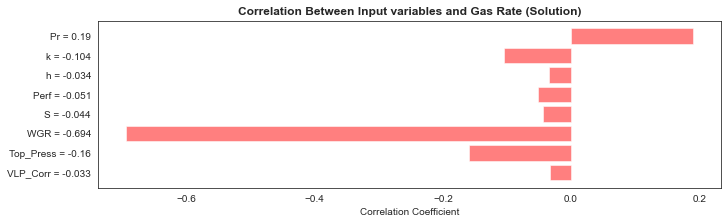

In [27]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

Gas_Sol_Coeff = corr_DF_Coeff['Sol_Gas']
### Convert Series to DataFrame 
Gas_Sol_Coeff_df = pd.Series.to_frame(Gas_Sol_Coeff)

### Drop Calculated variables (Sol_Gas, FBHP, Sol_WHP) Row and NaN values ###
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.dropna()
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Sol_Gas'], errors='ignore')
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['FBHP'], errors='ignore')
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Sol_WHP'], errors='ignore')

Gas_Sol_Coeff_df.reset_index(inplace=True)
Gas_Sol_Coeff_df.columns = ['Variable', 'Sol Gas Corr']
Gas_Sol_Coeff_df['Sol Gas Corr'] = Gas_Sol_Coeff_df['Sol Gas Corr'].round(3)


display(Gas_Sol_Coeff_df)

fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,3), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df['Variable'] + ' = ' + Gas_Sol_Coeff_df['Sol Gas Corr'].astype(str)

ax.barh(Input_Var_Names, Gas_Sol_Coeff_df['Sol Gas Corr'], align='center', color=c_red, alpha=0.5)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)', weight='bold', fontsize=12);

<font color='blue'>
    
# 10. PLOT IPR VS VLP
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(68,73)")

In [28]:
df_VLP_IPR.describe()

,0_G,0_IPR,0_VLP,1_G,1_IPR,1_VLP,2_G,2_IPR,2_VLP,3_G,...,296_VLP,297_G,297_IPR,297_VLP,298_G,298_IPR,298_VLP,299_G,299_IPR,299_VLP
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.991855,3217.828960,4572.239500,5.905553,3518.992150,2566.690000,12.735702,3728.648900,3639.847500,8.025566,...,2439.924000,3.372784,3712.625000,4893.287500,7.925152,3428.764050,4262.046500,5.762585,3250.493580,4098.256500
std,6.604817,864.172679,2798.859162,9.771178,948.695983,1840.498458,21.072169,1006.638717,2571.146485,13.278897,...,1952.134253,5.580518,1003.321423,1947.084909,13.112758,923.465953,2654.080312,9.534623,873.827524,2837.130284
min,0.024369,95.509200,0.000000,0.036052,102.913000,0.000000,0.077747,109.298000,0.000000,0.048994,...,0.000000,0.020590,107.490000,0.000000,0.048381,100.861000,0.000000,0.035179,95.451600,0.000000
25%,0.138612,3266.042500,3324.705000,0.205063,3567.732500,1848.840000,0.442231,3778.495000,0.000000,0.278677,...,0.000000,0.117115,3761.435000,4774.902500,0.275191,3477.182500,2768.407500,0.200098,3298.440000,0.000000
50%,0.783068,3591.955000,6105.310000,1.158471,3931.400000,2802.785000,2.498315,4167.010000,4708.945000,1.574345,...,3296.735000,0.661628,4149.870000,5285.345000,1.554645,3829.815000,5484.710000,1.130425,3629.120000,5496.095000
75%,4.388070,3648.652500,6668.310000,6.491713,3994.872500,3291.527500,13.999800,4234.902500,5158.737500,8.822152,...,3575.955000,3.707555,4217.800000,6087.000000,8.711768,3891.317500,6250.960000,6.334548,3686.687500,6412.272500
max,24.349500,3658.670000,6712.240000,36.022700,4006.080000,6990.630000,77.685300,4246.900000,7876.240000,48.954400,...,6179.400000,20.573300,4229.800000,7498.730000,48.341900,3902.180000,7123.410000,35.150600,3696.850000,6532.650000


## Plot VLP and IPR for specific Iteration (Index_TP)

In [29]:
df = df_VLP_IPR

def Plot_Vlp_vs_IPR(Index_TP=0):
    
    #Index_TP = 341 ## Specify iteration to plot VLP, IPR and Solution

    ## Get Column names
    df_col_names =df.columns.tolist()

    print('Iteration Index: ', Index_TP)
    print('IPR col name: ', df_col_names[Index_TP*3])
    print('VLP col name: ', df_col_names[(Index_TP*3)+1])

    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,5), layout ='constrained')

    ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
             marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

    ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
             markerfacecolor=(192/255, 192/255, 192/255))

    ax[0].plot(df_Input_All['Sol_Gas'].iloc[Index_TP], df_Input_All['FBHP'].iloc[Index_TP], label='Solution', marker = 'o', 
             markersize = 12,linestyle= '',
             markerfacecolor=(255/255, 140/255, 0/255) )

    ax[0].set_xlabel('Gas Rate, MMscfd')
    ax[0].set_ylabel('Pressure, psi')
    ax[0].set_title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
    ax[0].legend()
    ax[0].set_xlim(left=0)



    ### Second Chart ###
    ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
             marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

    ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
             markerfacecolor=(192/255, 192/255, 192/255))

    ax[1].plot(df_Input_All['Sol_Gas'].iloc[Index_TP], df_Input_All['FBHP'].iloc[Index_TP], label='Solution', marker = 'o', 
             markersize = 12,linestyle= '',
             markerfacecolor=(255/255, 140/255, 0/255) )

    ax[1].set_xlabel('Gas Rate, MMscfd')
    ax[1].set_ylabel('Pressure, psi')
    ax[1].set_title('VLP vs IPR (zoom)', weight='bold', color=(0/255, 0/255, 255/255))
    ax[1].legend()
    ax[1].set_xlim(left=0)

    P_max = df[df_col_names[(Index_TP*3)+1]].max()
    ax[1].set_ylim(top=P_max+1000)

    #ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

    #str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
    #ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));

    print("Gas Solution = ", df_Input_All['Sol_Gas'].iloc[Index_TP])
    print("Pressure Solution = ", df_Input_All['FBHP'].iloc[Index_TP])
    print('---')
    print("Pr = ", df_Input_All['Pr'].iloc[Index_TP])
    print("k = ", df_Input_All['k'].iloc[Index_TP])
    print("h = ", df_Input_All['h'].iloc[Index_TP])
    print("Perf = ", df_Input_All['Perf'].iloc[Index_TP])
    print("WGR = ", df_Input_All['WGR'].iloc[Index_TP])
    print("S = ", df_Input_All['S'].iloc[Index_TP])
    

In [30]:
# call function and widget to visualize VLP vs IPR curves for specific Index
widgets.interact(Plot_Vlp_vs_IPR, Index_TP=(0,iter,1))


interactive(children=(IntSlider(value=0, description='Index_TP', max=300), Output()), _dom_classes=('widget-in…

<function __main__.Plot_Vlp_vs_IPR(Index_TP=0)>

## 9.2 Plot multiple (IPR + VLP) curves

### For high iteration number it does not make sense to plot all IPR/VLP curves

6.673533439400003
4204.5841796876
2.3576590534
3375.334082031
3.564463615
3801.170410156


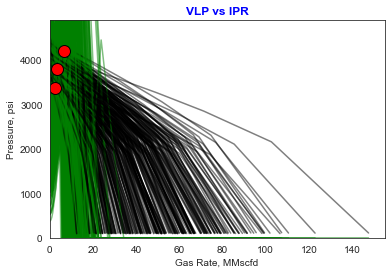

In [32]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(iter)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i], alpha=0.5)
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i], alpha=0.5)
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)



x = np.percentile(df_Input_sol['Sol_Gas'], 90)
y = np.percentile(df_Input_sol['FBHP'], 90)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

x = np.percentile(df_Input_sol['Sol_Gas'], 10)
y = np.percentile(df_Input_sol['FBHP'], 10)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

x = np.percentile(df_Input_sol['Sol_Gas'], 50)
y = np.percentile(df_Input_sol['FBHP'], 50)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

P_max = df_Input_sol['FBHP'].max()
plt.ylim(top=P_max+500)

plt.show()

### Plot Solutions as Scatter and Distributions

<div class="alert alert-success">
<font color='blue'>
    
# CREATE POWERPOINT PRESENTATION

***
</font>
</div>


In [ ]:
from pptx import Presentation
X = Presentation()

In [ ]:
Layout = X.slide_layouts[0] 
first_slide = X.slides.add_slide(Layout) # Adding first slide
first_slide.shapes.title.text = "Creating a powerpoint using Python"

first_slide.placeholders[1].text = "Created by Tutorialpoints"
X.save("First_presentation.pptx")